In [88]:
%matplotlib inline

# DataFrame
import pandas as pd

# Elasticsearch
from elasticsearch import Elasticsearch, helpers

# datetime
from datetime import datetime

# isnan()
import math

# plot
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# OneClassSVM
from sklearn.svm import OneClassSVM

# stats
from scipy import stats

plt.style.use('ggplot')

## Task 1. Delay scatter plots about x -> y v.s. y -> x. Clock synchronization problem?

In [87]:
# MWT2_a = 192.170.227.160    University of Chicago
# MWT2_b = 149.165.225.223    Indiana University
# MWT2_c = 72.36.96.4         UIUC

# x = a -> b
# y = b -> a

x_src_ip = '192.170.227.160'
x_dest_ip = '149.165.225.223'
y_src_ip = '149.165.225.223'
y_dest_ip = '192.170.227.160'

x_pkl = pd.read_pickle('./My_data/week0708_clean_from_{}_to_{}.pkl'.format(x_src_ip, x_dest_ip))
y_pkl = pd.read_pickle('./My_data/week0708_clean_from_{}_to_{}.pkl'.format(y_src_ip, y_dest_ip))

temp = x_pkl.delay_median
x_ts = temp[temp.notnull()]
temp = y_pkl.delay_median
y_ts = temp[temp.notnull()]

x_min = x_ts.index.min()
x_max = x_ts.index.max()
y_min = y_ts.index.min()
y_max = y_ts.index.max()
both_min = min(x_min, y_min)
both_max = max(x_max, y_max)
length_ms = both_max - both_min   # Note that the time index is "ms"
length_day = length_ms / 1000 / 60 / 60 / 24

bin_width_minute = 10
bin_width_ms = bin_width_minute * 60 * 1000   # ms

print('Info about time: ')
print('x min = {}'.format(x_min))
print('x max = {}'.format(x_max))
print('y min = {}'.format(y_min))
print('y max = {}'.format(y_max))
print('min = {}'.format(both_min))
print('max = {}'.format(both_max))
print('Length of the time period = {} days'.format(length_day))
print('Width of time bin = {} minutes'.format(bin_width_minute))
print('Number of time bins = {}'.format(length_ms / bin_width_ms))

table_x = pd.DataFrame()
table_y = pd.DataFrame()
count = 0
for t in range(both_min, both_max, bin_width_ms):
    count += 1
    bin_start = t
    bin_end = t + bin_width_ms
    table_x.set_value(count, 'bin_start', bin_start)
    table_x.set_value(count, 'bin_end', bin_end)
    table_y.set_value(count, 'bin_start', bin_start)
    table_y.set_value(count, 'bin_end', bin_end)
    
    temp = x_ts[(x_ts.index >= bin_start) & (x_ts.index < bin_end)]
    cnt = len(temp)
    table_x.set_value(count, 'count', cnt)
    if cnt > 0:
        table_x.set_value(count, 'mean', temp.values.mean())

    temp = y_ts[(y_ts.index >= bin_start) & (y_ts.index < bin_end)]
    cnt = len(temp)
    table_y.set_value(count, 'count', cnt)
    if cnt > 0:
        table_y.set_value(count, 'mean', temp.values.mean())

    

print(count)
table_x
table_y
table_x.groupby('count').count()
table_y.groupby('count').count()
table_x.to_pickle('./My_data/day0727_1x.pkl')
table_y.to_pickle('./My_data/day0727_1y.pkl')
print('Data done. Now draw. ')

Info about time: 
x min = 1451607300000
x max = 1464731700000
y min = 1451606700000
y max = 1464731400000
min = 1451606700000
max = 1464731700000
Length of the time period = 151.90972222222223 days
Width of time bin = 10 minutes
Number of time bins = 21875.0
21875
Data done. Now draw. 


(0, 6)

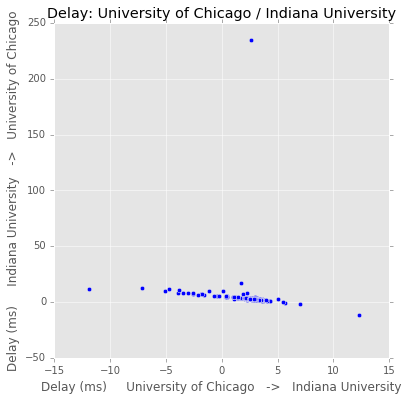

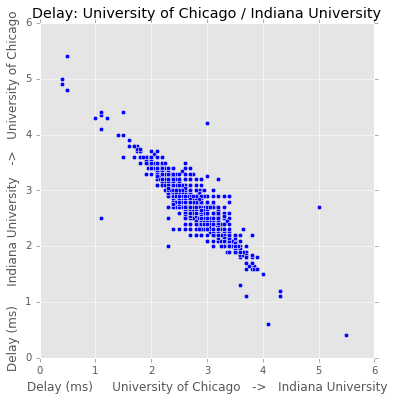

In [92]:
table_x = pd.read_pickle('./My_data/day0727_1x.pkl')
table_y = pd.read_pickle('./My_data/day0727_1y.pkl')

name1 = 'University of Chicago'
name2 = 'Indiana University'

size = 6

# Big picture
fig = plt.figure(figsize=[size, size])
plt.scatter(table_x['mean'], table_y['mean'])
plt.title('Delay: {} / {}'.format(name1, name2))
plt.xlabel('Delay (ms)     {}   ->   {}'.format(name1, name2))
plt.ylabel('Delay (ms)     {}   ->   {}'.format(name2, name1))

# Focus on part
fig = plt.figure(figsize=[size, size])
plt.scatter(table_x['mean'], table_y['mean'])
plt.title('Delay: {} / {}'.format(name1, name2))
plt.xlabel('Delay (ms)     {}   ->   {}'.format(name1, name2))
plt.ylabel('Delay (ms)     {}   ->   {}'.format(name2, name1))
plt.xlim([0, 6])
plt.ylim([0, 6])

In [93]:
# MWT2_a = 192.170.227.160    University of Chicago
# MWT2_b = 149.165.225.223    Indiana University
# MWT2_c = 72.36.96.4         UIUC

# x = a -> c
# y = c -> a

x_src_ip = '192.170.227.160'
x_dest_ip = '72.36.96.4'
y_src_ip = '72.36.96.4'
y_dest_ip = '192.170.227.160'

x_pkl = pd.read_pickle('./My_data/week0708_clean_from_{}_to_{}.pkl'.format(x_src_ip, x_dest_ip))
y_pkl = pd.read_pickle('./My_data/week0708_clean_from_{}_to_{}.pkl'.format(y_src_ip, y_dest_ip))

temp = x_pkl.delay_median
x_ts = temp[temp.notnull()]
temp = y_pkl.delay_median
y_ts = temp[temp.notnull()]

x_min = x_ts.index.min()
x_max = x_ts.index.max()
y_min = y_ts.index.min()
y_max = y_ts.index.max()
both_min = min(x_min, y_min)
both_max = max(x_max, y_max)
length_ms = both_max - both_min   # Note that the time index is "ms"
length_day = length_ms / 1000 / 60 / 60 / 24

bin_width_minute = 10
bin_width_ms = bin_width_minute * 60 * 1000   # ms

print('Info about time: ')
print('x min = {}'.format(x_min))
print('x max = {}'.format(x_max))
print('y min = {}'.format(y_min))
print('y max = {}'.format(y_max))
print('min = {}'.format(both_min))
print('max = {}'.format(both_max))
print('Length of the time period = {} days'.format(length_day))
print('Width of time bin = {} minutes'.format(bin_width_minute))
print('Number of time bins = {}'.format(length_ms / bin_width_ms))

table_x = pd.DataFrame()
table_y = pd.DataFrame()
count = 0
for t in range(both_min, both_max, bin_width_ms):
    count += 1
    bin_start = t
    bin_end = t + bin_width_ms
    table_x.set_value(count, 'bin_start', bin_start)
    table_x.set_value(count, 'bin_end', bin_end)
    table_y.set_value(count, 'bin_start', bin_start)
    table_y.set_value(count, 'bin_end', bin_end)
    
    temp = x_ts[(x_ts.index >= bin_start) & (x_ts.index < bin_end)]
    cnt = len(temp)
    table_x.set_value(count, 'count', cnt)
    if cnt > 0:
        table_x.set_value(count, 'mean', temp.values.mean())

    temp = y_ts[(y_ts.index >= bin_start) & (y_ts.index < bin_end)]
    cnt = len(temp)
    table_y.set_value(count, 'count', cnt)
    if cnt > 0:
        table_y.set_value(count, 'mean', temp.values.mean())

    

print(count)
table_x
table_y
table_x.groupby('count').count()
table_y.groupby('count').count()
table_x.to_pickle('./My_data/day0727_2x.pkl')
table_y.to_pickle('./My_data/day0727_2y.pkl')
print('Data done. Now draw. ')

Info about time: 
x min = 1451607300000
x max = 1464731700000
y min = 1451607600000
y max = 1464731700000
min = 1451607300000
max = 1464731700000
Length of the time period = 151.90277777777777 days
Width of time bin = 10 minutes
Number of time bins = 21874.0
21874
Data done. Now draw. 


(0, 4)

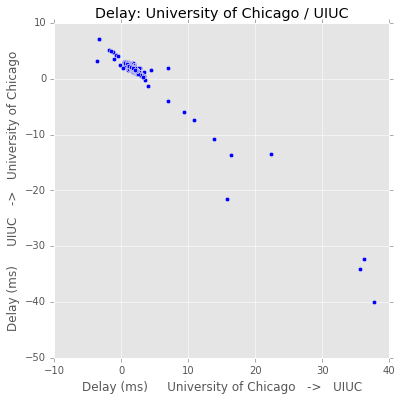

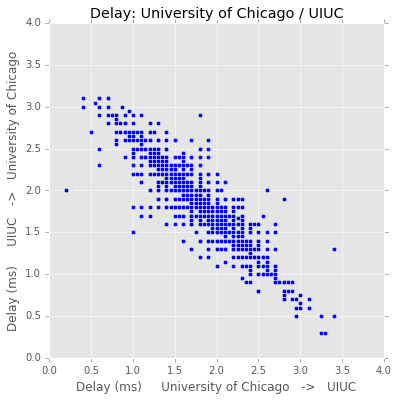

In [95]:
table_x = pd.read_pickle('./My_data/day0727_2x.pkl')
table_y = pd.read_pickle('./My_data/day0727_2y.pkl')

name1 = 'University of Chicago'
name2 = 'UIUC'

size = 6

# Big picture
fig = plt.figure(figsize=[size, size])
plt.scatter(table_x['mean'], table_y['mean'])
plt.title('Delay: {} / {}'.format(name1, name2))
plt.xlabel('Delay (ms)     {}   ->   {}'.format(name1, name2))
plt.ylabel('Delay (ms)     {}   ->   {}'.format(name2, name1))

# Focus on part
fig = plt.figure(figsize=[size, size])
plt.scatter(table_x['mean'], table_y['mean'])
plt.title('Delay: {} / {}'.format(name1, name2))
plt.xlabel('Delay (ms)     {}   ->   {}'.format(name1, name2))
plt.ylabel('Delay (ms)     {}   ->   {}'.format(name2, name1))
plt.xlim([0, 4])
plt.ylim([0, 4])

In [96]:
# MWT2_a = 192.170.227.160    University of Chicago
# MWT2_b = 149.165.225.223    Indiana University
# MWT2_c = 72.36.96.4         UIUC

# x = b -> c
# y = c -> b

x_src_ip = '149.165.225.223'
x_dest_ip = '72.36.96.4'
y_src_ip = '72.36.96.4'
y_dest_ip = '149.165.225.223'

x_pkl = pd.read_pickle('./My_data/week0708_clean_from_{}_to_{}.pkl'.format(x_src_ip, x_dest_ip))
y_pkl = pd.read_pickle('./My_data/week0708_clean_from_{}_to_{}.pkl'.format(y_src_ip, y_dest_ip))

temp = x_pkl.delay_median
x_ts = temp[temp.notnull()]
temp = y_pkl.delay_median
y_ts = temp[temp.notnull()]

x_min = x_ts.index.min()
x_max = x_ts.index.max()
y_min = y_ts.index.min()
y_max = y_ts.index.max()
both_min = min(x_min, y_min)
both_max = max(x_max, y_max)
length_ms = both_max - both_min   # Note that the time index is "ms"
length_day = length_ms / 1000 / 60 / 60 / 24

bin_width_minute = 10
bin_width_ms = bin_width_minute * 60 * 1000   # ms

print('Info about time: ')
print('x min = {}'.format(x_min))
print('x max = {}'.format(x_max))
print('y min = {}'.format(y_min))
print('y max = {}'.format(y_max))
print('min = {}'.format(both_min))
print('max = {}'.format(both_max))
print('Length of the time period = {} days'.format(length_day))
print('Width of time bin = {} minutes'.format(bin_width_minute))
print('Number of time bins = {}'.format(length_ms / bin_width_ms))

table_x = pd.DataFrame()
table_y = pd.DataFrame()
count = 0
for t in range(both_min, both_max, bin_width_ms):
    count += 1
    bin_start = t
    bin_end = t + bin_width_ms
    table_x.set_value(count, 'bin_start', bin_start)
    table_x.set_value(count, 'bin_end', bin_end)
    table_y.set_value(count, 'bin_start', bin_start)
    table_y.set_value(count, 'bin_end', bin_end)
    
    temp = x_ts[(x_ts.index >= bin_start) & (x_ts.index < bin_end)]
    cnt = len(temp)
    table_x.set_value(count, 'count', cnt)
    if cnt > 0:
        table_x.set_value(count, 'mean', temp.values.mean())

    temp = y_ts[(y_ts.index >= bin_start) & (y_ts.index < bin_end)]
    cnt = len(temp)
    table_y.set_value(count, 'count', cnt)
    if cnt > 0:
        table_y.set_value(count, 'mean', temp.values.mean())

    

print(count)
table_x
table_y
table_x.groupby('count').count()
table_y.groupby('count').count()
table_x.to_pickle('./My_data/day0727_3x.pkl')
table_y.to_pickle('./My_data/day0727_3y.pkl')
print('Data done. Now draw. ')

Info about time: 
x min = 1451607000000
x max = 1464731100000
y min = 1451607300000
y max = 1464731100000
min = 1451607000000
max = 1464731100000
Length of the time period = 151.89930555555557 days
Width of time bin = 10 minutes
Number of time bins = 21873.5
21874
Data done. Now draw. 


(0, 30)

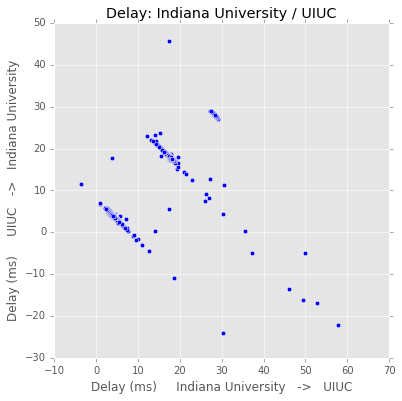

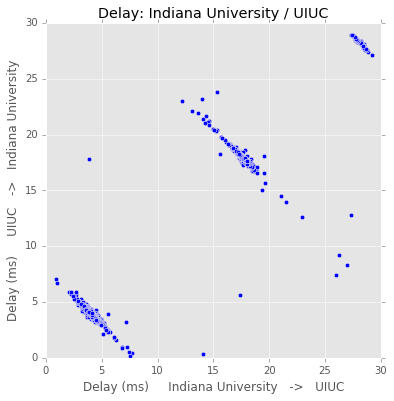

In [100]:
table_x = pd.read_pickle('./My_data/day0727_3x.pkl')
table_y = pd.read_pickle('./My_data/day0727_3y.pkl')

name1 = 'Indiana University'
name2 = 'UIUC'

size = 6

# Big picture
fig = plt.figure(figsize=[size, size])
plt.scatter(table_x['mean'], table_y['mean'])
plt.title('Delay: {} / {}'.format(name1, name2))
plt.xlabel('Delay (ms)     {}   ->   {}'.format(name1, name2))
plt.ylabel('Delay (ms)     {}   ->   {}'.format(name2, name1))

# Focus on part
fig = plt.figure(figsize=[size, size])
plt.scatter(table_x['mean'], table_y['mean'])
plt.title('Delay: {} / {}'.format(name1, name2))
plt.xlabel('Delay (ms)     {}   ->   {}'.format(name1, name2))
plt.ylabel('Delay (ms)     {}   ->   {}'.format(name2, name1))
plt.xlim([0, 30])
plt.ylim([0, 30])

## Task 2. Collect more data: src = MWT2_a (UChicago), dest = 20 sites. 

### Task 2.1   Try, for one week, get the metadata of all the records. 

In [107]:
datetime.strftime(datetime.now(), '%Y-%m-%d %H:%M:%S')

'2016-07-27 23:48:03'